In [1]:
import pandas as pd
import numpy as np
import json, os
from pandas.io.json import json_normalize

In [2]:
import missingno as msno
import seaborn as sn
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
os.chdir('D:/Kaggle/Two Sigma Connect')

In [5]:
# data = []
# with open('train.json') as f:
#     for line in f:
#         data.append(json.loads(line))

# data_n = json_normalize(data)

df = pd.read_json('train.json')
# print df.head(2)
print df.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')


In [ ]:
msno.bar(df)

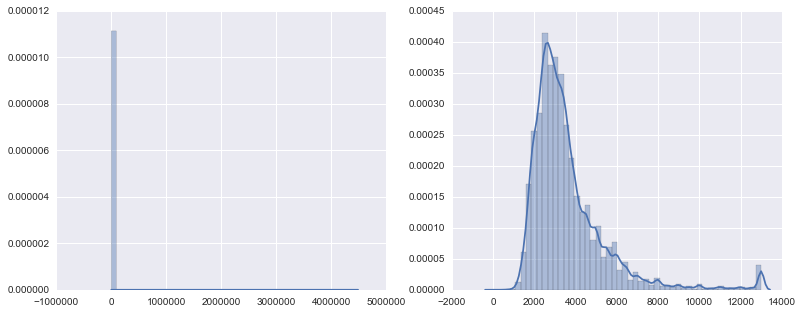

In [29]:
# price distribution 

df_price = df.copy()
upperLimit = np.percentile(df_price.price.values, 99)
df_price['price'].ix[df_price['price'] > upperLimit] = upperLimit
fig,(ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(13, 5)
sn.distplot(df.price.values, kde = True, ax = ax1)
sn.distplot(df_price.price.values, kde = True, ax = ax2)

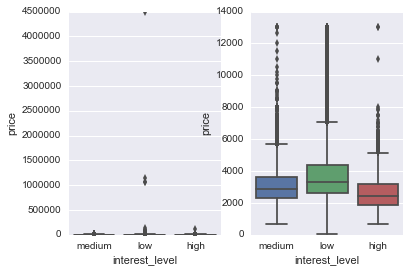

In [37]:
# box plot by interest level

fig,(ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches = (50,50)
sn.boxplot(x = 'interest_level', y = 'price', data = df, orient = 'v', ax = ax1)
sn.boxplot(x = 'interest_level', y = 'price', data = df_price, orient = 'v', ax = ax2)

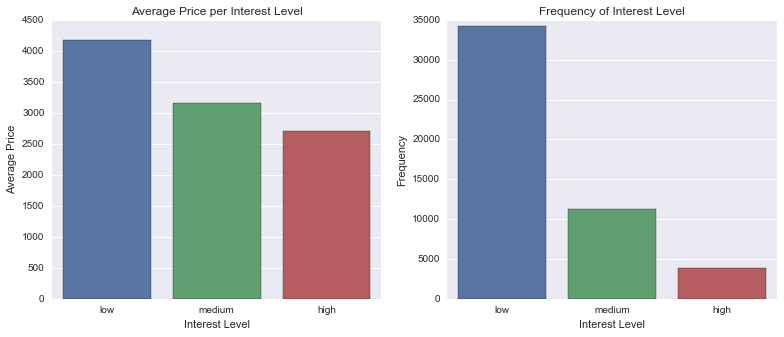

In [72]:
# plot avg.price by interest level

fig,(ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(13,5)

df_avgPrice = pd.DataFrame(df.groupby('interest_level')['price'].mean()).reset_index()
df_avgPrice = df_avgPrice.sort_values(by = 'price', ascending = False)

sn.barplot(x = 'interest_level', y = 'price', data = df_avgPrice, orient = 'v', ax = ax1)
ax1.set(xlabel = 'Interest Level', ylabel = 'Average Price', title = 'Average Price per Interest Level')

df_freq = pd.DataFrame(df.interest_level.value_counts()).reset_index()

sn.barplot(x = 'index', y = 'interest_level', data = df_freq, orient = 'v', ax = ax2)
ax2.set(xlabel = 'Interest Level', ylabel = 'Frequency', title = 'Frequency of Interest Level')


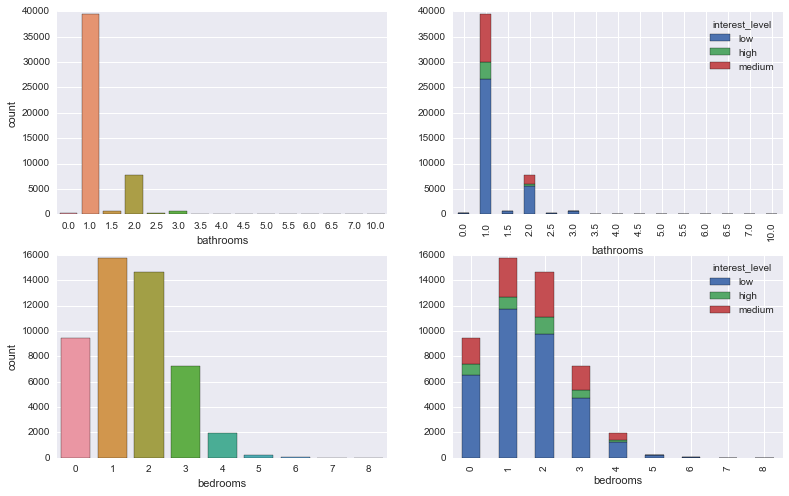

In [6]:
# Visualize bath / bed rooms vs interest level

fig,(axes) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(13, 8)

# using value_counts method

# df_bath = pd.DataFrame(df.bathrooms.value_counts()).reset_index()
# df_bath['baths'] = df_bath['index']
# sn.barplot(x = 'baths', y = 'bathrooms', data = df_bath, ax = ax1)

# using countplot method
# bathrooms
sn.countplot( x = 'bathrooms', data = df, ax = axes[0][0])

df_bath_stacked = df.groupby(['bathrooms', 'interest_level'])['bathrooms'].count().unstack('interest_level').fillna(0)
df_bath_stacked[['low', 'high', 'medium']].plot(kind = 'bar', stacked = True, ax = axes[0][1])

# bedrooms
sn.countplot( x = 'bedrooms', data = df, ax = axes[1][0])

df_bed_stacked = df.groupby(['bedrooms', 'interest_level'])['bedrooms'].count().unstack('interest_level').fillna(0)
df_bed_stacked[['low', 'high', 'medium']].plot(kind = 'bar', stacked = True, ax = axes[1][1])

In [7]:
print df_bed_stacked

interest_level    high      low  medium
bedrooms                               
0                847.0   6518.0  2110.0
1                943.0  11715.0  3094.0
2               1306.0   9801.0  3516.0
3                592.0   4727.0  1957.0
4                149.0   1233.0   547.0
5                  2.0    243.0     2.0
6                  0.0     44.0     2.0
7                  0.0      1.0     1.0
8                  0.0      2.0     0.0


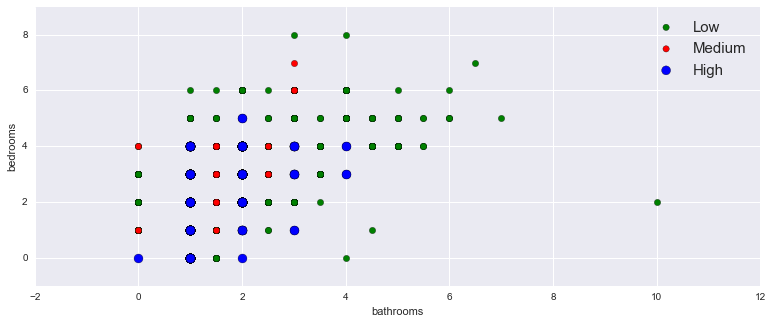

In [104]:
# bath vs bed vs interest levels

fig, (ax1) = plt.subplots()
fig.set_size_inches(13, 5)

ax1.scatter(df[df['interest_level'] == 'low']['bathrooms'], df[df['interest_level'] == 'low']['bedrooms'], c = 'green', s = 40)
ax1.scatter(df[df['interest_level'] == 'medium']['bathrooms'], df[df['interest_level'] == 'medium']['bedrooms'], c = 'red', s = 40)
ax1.scatter(df[df['interest_level'] == 'high']['bathrooms'], df[df['interest_level'] == 'high']['bedrooms'], c = 'blue', s = 80)

ax1.set_xlabel('bathrooms')
ax1.set_ylabel('bedrooms')

ax1.legend(('Low', 'Medium', 'High'), scatterpoints = 1, loc = 'upper right', fontsize = 15)

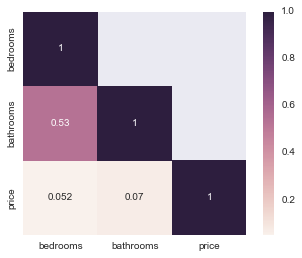

In [121]:
# correlation between price and bed / bath rooms

corr = df[['bedrooms', 'bathrooms', 'price']].corr()
mask = np.array(corr)

mask[np.tril_indices_from(mask)] = False
fig,(ax) = plt.subplots()
fig.set_size_inches = (20, 10)
sn.heatmap(corr, mask = mask, annot = True, square = True)
